In [1]:
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
files = [f for f in os.listdir('datos') if f.startswith('MERCEDES')]
series = {}
for f in files:
    f = 'datos/' + f
    print f
    name = f.split('_')[-2]
    df = pd.read_csv(f, sep='\t', index_col='Date', parse_dates=True)
    s = df['Value' if 'Value' in df.columns else 'MERCEDES']
    series[name] = s['2006-01-01':]

df = pd.DataFrame(series)
df.to_csv('datos/clima_datos_unidos.csv')
df.head()

datos/MERCEDES_ESOL_FUS.txt
datos/MERCEDES_RAIN_FUS.txt
datos/MERCEDES_RHUM_FUS.txt
datos/MERCEDES_TMAX_FUS.txt
datos/MERCEDES_TMIN_FUS.txt


,ESOL,RAIN,RHUM,TMAX,TMIN
Date,,,,,
2006-01-01,22.4,0,60,29.5,19
2006-01-02,24.3,0,76,37.2,21
2006-01-03,20.0,0,63,34.2,17
2006-01-04,18.2,0,60,30.0,14
2006-01-05,15.8,0,50,28.5,13


In [ ]:
# Exploracion

In [3]:
def moving_average(s, n=30) :
    ret = np.nan_to_num(s.values).cumsum()
    ret[n:] = ret[n:] - ret[:-n]
    ma = ret[n - 1:] / n
    print ma[0]
    return pd.Series(ma, index=s.index[n-1:])

ESOL 20.8066666667
RAIN 1.18333333333
RHUM 60.4
TMAX 31.5833333333
TMIN 16.8061904763


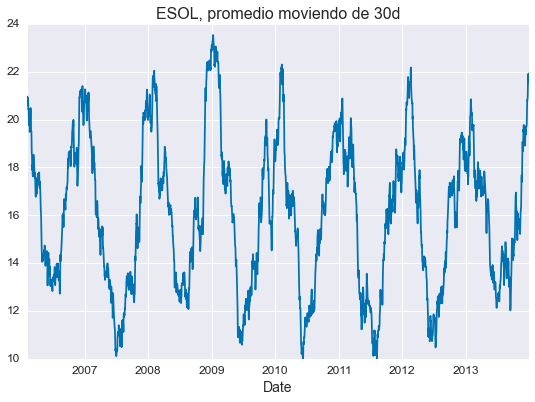

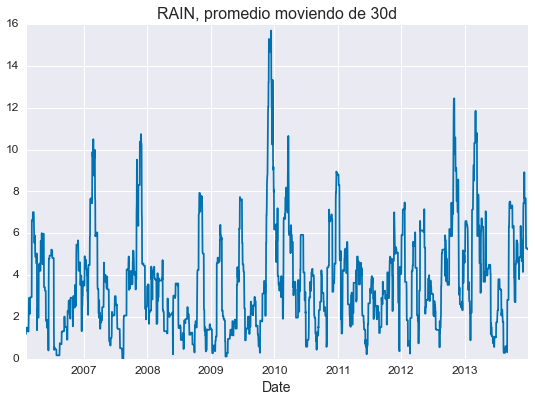

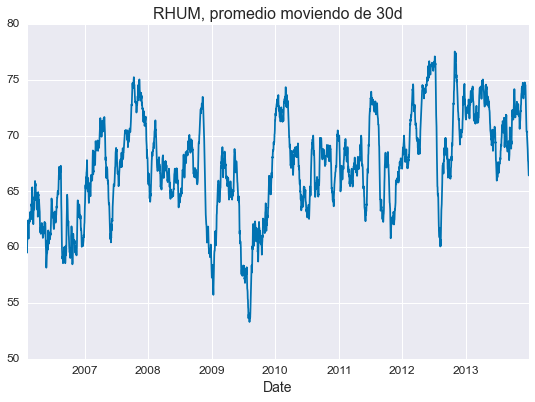

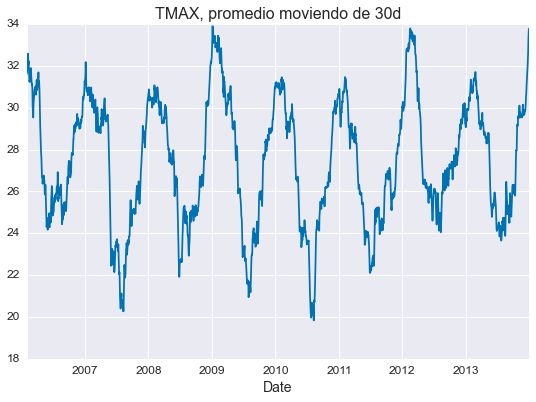

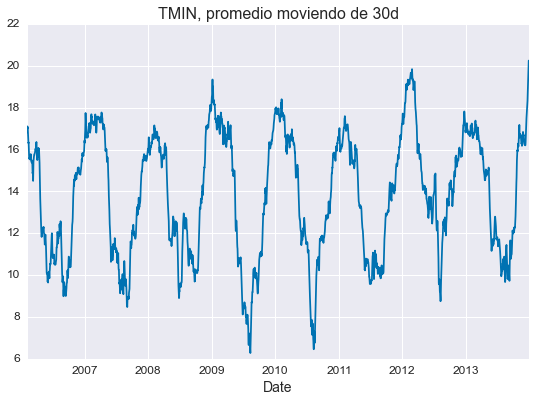

In [4]:
df_moviendo = copy.deepcopy(df)
for col in df.columns:
    print col,
    ma = moving_average(df[col])
    fig, ax = plt.subplots(1)
    ma.plot(ax=ax, title=col + ', promedio moviendo de 30d')
    df_moviendo[col] = ma

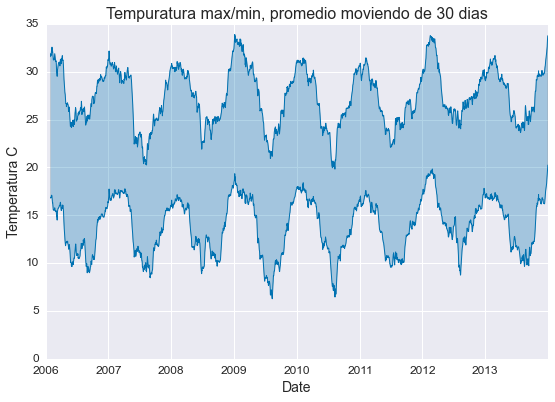

In [5]:
fig, ax = plt.subplots(1)
df_moviendo['TMAX'].plot(ax=ax, color=sns.color_palette()[0], linewidth=1)
df_moviendo['TMIN'].plot(ax=ax, color=sns.color_palette()[0], linewidth=1)
ax.set_ylim(0, ax.get_ylim()[1])
ax.fill_between(df_moviendo.index, df_moviendo['TMIN'], df_moviendo['TMAX'], alpha=0.3)
ax.set_ylabel('Temperatura C')
ax.set_title('Tempuratura max/min, promedio moviendo de 30 dias')